# PROJECT - Data Analytics using Machine Learning in Cybersecurity Domain

In [1]:
#Load Libraries
import pandas as pd
import numpy as np

In [3]:
#Load Dataset
data=pd.read_csv('dataset.csv')
data

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [4]:
data.shape

(100000, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [7]:
#Evaluating hash column
#Assessing unique values
data[["hash"]].value_counts()

hash                                                            
024b27972a6b3a1535510e9c0f154fb1a8e3a2afb25d5c30d2f6a9d23424d925    1000
com.epocrates.apk                                                   1000
com.jrtstudio.music.apk                                             1000
com.imangi.templerun2.apk                                           1000
com.i6.FlightSimulatorAirplane3D.apk                                1000
                                                                    ... 
42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0    1000
3d51872172186d55238444384224ca46d0f1a7ab87910494c6354a7a53074387    1000
3d131647f203a5283ef2488c1d48c93f72b201d422675df552c62b7069a3bc2b    1000
3c722b32535e6e8ea1bbf8accdff73376cf2c3393d9325304ffc37c3213fdb4c    1000
imoblife.toolbox.full.apk                                           1000
Length: 100, dtype: int64

In [8]:
#Mapping hash string column to readable integer value
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data["hash"]=labelencoder.fit_transform(data["hash"])

data["hash"].unique()

array([30, 75, 89, 38, 56, 22, 53, 72, 76, 94, 27, 84, 74, 69, 93, 99, 92,
       95, 80, 57, 81, 64, 87, 62, 82, 55, 60, 50, 88, 71, 98, 52, 83, 54,
        8,  0, 10, 67, 61, 73, 70, 12, 59, 79, 66, 19, 34, 68, 45, 86, 90,
       77, 97, 91, 58, 51, 35, 28, 63, 65, 96, 78,  4, 16, 85, 20, 21, 17,
       44, 47, 43,  6, 33, 49, 41,  2, 42, 29,  9, 11, 13, 26, 24, 23, 36,
        3, 31,  5,  7, 15, 25, 37, 40, 32, 46, 39, 48, 18, 14,  1])

In [9]:
#all feature values are now integers
data.describe()

,hash,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,49.500000,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,28.866214,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,24.750000,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,49.500000,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,74.250000,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,99.000000,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [10]:
#since many of the above features have mean, min and max value=0, we remove them
data.dropna()
data.drop(["state","usage_counter","normal_prio","policy","vm_pgoff","cgtime","signal_nvcsw","task_size","cached_hole_size","hiwater_rss","lock","nr_ptes"
],axis=1,inplace=True)

In [12]:
data.drop_duplicates(inplace=True)

#no duplicate values found

In [14]:
data.isna().sum()
#no missing values found

hash                 0
millisecond          0
classification       0
prio                 0
static_prio          0
vm_truncate_count    0
free_area_cache      0
mm_users             0
map_count            0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
utime                0
stime                0
gtime                0
dtype: int64

In [15]:
#Converting classification class to number for model compatibility
#Malware is converted to 0 and Benign to 1
mapping={"malware":0,"benign":1}

data["classification"]=data["classification"].map(mapping)

#to verify the mapping, we check unique values in diagnosis column
data["classification"].unique()

array([0, 1], dtype=int64)

In [16]:
#number of instances from each class
data['classification'].value_counts()

0    50000
1    50000
Name: classification, dtype: int64

In [18]:
data.corr()

,hash,millisecond,classification,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
hash,1.000000e+00,-4.282727e-15,8.660687e-01,-1.449737e-01,0.273040,0.325761,0.060407,0.073622,0.291705,-0.008343,...,0.301016,-0.005283,0.347548,0.157276,0.006527,0.301016,0.180082,0.325800,0.061715,0.002954
millisecond,-4.282727e-15,1.000000e+00,-5.485946e-15,-1.110893e-12,0.091229,0.284907,0.043046,0.295915,0.228902,0.310384,...,-0.108636,0.244329,0.177025,0.240078,-0.046854,-0.108636,0.167288,0.249216,0.222714,0.208772
classification,8.660687e-01,-5.485946e-15,1.000000e+00,-1.100359e-01,0.317941,0.354861,0.051237,0.093641,0.271227,0.059291,...,0.324954,-0.006952,0.386889,0.143791,-0.003070,0.324954,0.137883,0.369931,0.042037,0.014416
prio,-1.449737e-01,-1.110893e-12,-1.100359e-01,1.000000e+00,-0.137493,-0.197176,0.054707,-0.120580,-0.218144,-0.069935,...,0.060631,0.090890,-0.098285,0.042366,0.010503,0.060631,-0.010575,-0.115542,0.007504,0.049742
static_prio,2.730405e-01,9.122893e-02,3.179406e-01,-1.374934e-01,1.000000,0.617350,-0.057974,0.581395,0.703478,0.425409,...,-0.408907,-0.063590,0.874921,0.065555,0.000217,-0.408907,0.107777,0.773214,0.245480,-0.053098
vm_truncate_count,3.257606e-01,2.849068e-01,3.548607e-01,-1.971759e-01,0.617350,1.000000,0.111448,0.837655,0.752030,0.420990,...,-0.390934,0.404753,0.772611,0.337080,0.010717,-0.390934,0.273491,0.864216,0.609531,0.240905
free_area_cache,6.040701e-02,4.304584e-02,5.123678e-02,5.470736e-02,-0.057974,0.111448,1.000000,0.086429,0.008055,0.155131,...,-0.002539,0.112068,0.000547,0.027679,0.126070,-0.002539,-0.037745,0.055683,0.088446,0.011430
mm_users,7.362244e-02,2.959147e-01,9.364091e-02,-1.205803e-01,0.581395,0.837655,0.086429,1.000000,0.623552,0.393695,...,-0.605997,0.527548,0.711425,0.358894,0.013050,-0.605997,0.210377,0.850822,0.708472,0.235741
map_count,2.917048e-01,2.289021e-01,2.712274e-01,-2.181436e-01,0.703478,0.752030,0.008055,0.623552,1.000000,0.483313,...,-0.363882,0.073957,0.658842,0.231919,0.001496,-0.363882,0.301760,0.678470,0.344932,0.091031
total_vm,-8.342979e-03,3.103837e-01,5.929110e-02,-6.993499e-02,0.425409,0.420990,0.155131,0.393695,0.483313,1.000000,...,-0.326409,-0.079146,0.300292,0.072151,0.013003,-0.326409,0.009589,0.316052,0.155409,-0.002542


<AxesSubplot:>

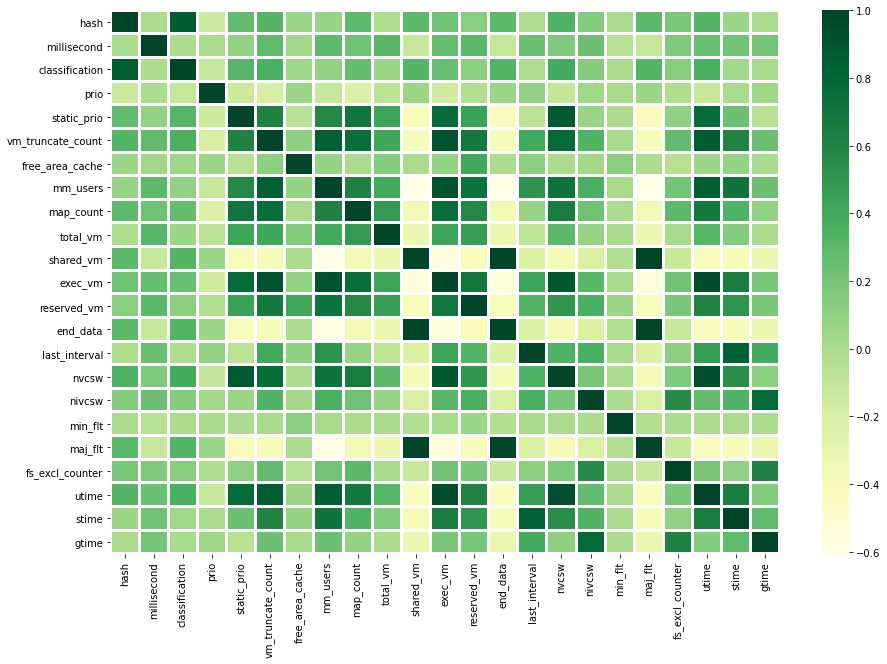

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(15,10)) 
sns.heatmap(data.corr(),linewidths=2,cmap="YlGn")

## SPLITTING TEST AND TRAIN DATA

In [23]:
#Defining the feaature set,X and target set,y 
X1=data.drop("classification",axis=1)
y1=data["classification"]

In [24]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.5, random_state = 0)
X1_train

,hash,millisecond,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,shared_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
24341,82,341,3069456384,16780,14829,0,752,7101,219,120,...,120,3475,346873,146,1,120,0,385838,5,1
67534,17,534,3069726720,14001,10755,0,630,4014,36,120,...,120,0,337751,0,1,120,0,372816,3,0
35080,0,80,3070222336,14019,9698,0,615,2666,34,120,...,120,0,337749,0,1,120,0,371784,3,0
4828,56,828,3070136320,24029,19575,0,799,8577,456,120,...,120,4356,364406,20,1,120,0,405175,5,1
59259,65,259,3070103552,15117,12719,0,674,5602,236,120,...,120,0,340321,32,1,120,5,377738,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,64,243,3069685760,15950,14764,0,718,6590,203,120,...,120,5492,348264,68,0,120,3,385401,5,7
45891,19,891,3069251584,14207,12855,18,724,4977,99,112,...,112,0,338188,47,1,112,3,377689,3,5
42613,59,613,3070140416,16907,17789,0,778,6760,77,120,...,120,5492,351154,173,1,120,6,391155,5,11
43567,79,567,3070078976,15553,14986,1,727,10471,183,120,...,120,3473,346447,44,1,120,2,383591,4,2


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [26]:
X1_train

array([[ 1.12421969, -0.54781785, -0.83755581, ...,  0.03771405,
         1.13736649, -0.20153536],
       [-1.12675879,  0.12026367,  0.07336381, ..., -1.24367048,
        -1.29477467, -0.50839839],
       [-1.71547625, -1.45128561,  1.74338312, ..., -1.34522085,
        -1.29477467, -0.50839839],
       ...,
       [ 0.32771961,  0.3937271 ,  1.46734687, ...,  0.56091491,
         1.13736649,  2.86709491],
       [ 1.02032838,  0.23449523,  1.26031968, ..., -0.18339415,
        -0.07870409,  0.10532767],
       [-0.19173696, -0.8005119 ,  1.61916681, ..., -1.28480231,
        -1.29477467, -0.50839839]])

## CLASSIFIER 1: SVM 

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X1_train, y1_train)

SVC(random_state=0)

In [28]:
y1_pred = classifier.predict(X1_test)
y1_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
#Script for SVM 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100))]: 
    method.fit(X1_train,y1_train)
    predict = method.predict(X1_test)
    target_names=['1','0']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y1_test,y1_pred))  
    print(classification_report(y1_test,y1_pred,target_names=target_names))


Estimator: SVM
[[25010     3]
 [    0 24987]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25013
           0       1.00      1.00      1.00     24987

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [ ]:
cf_matrix = confusion_matrix(y1_test, y1_pred)

#Confusion Matrix Visualization
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
cf = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGn')
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
print(cf)


## CLASSIFIER 2: NAIVE BAYES

In [60]:
#Script for naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  


In [61]:
# Init the Gaussian Classifier
model = GaussianNB()

In [62]:
# Train the model 
model.fit(X1_train, y1_train)

GaussianNB()

In [63]:
# Predict Output 
pred = model.predict(X1_test)

In [64]:
X1_test

array([[-0.39951959,  0.28641866,  1.63296862, ...,  0.2224137 ,
         1.13736649,  1.94650583],
       [ 1.60904583, -0.00435257,  0.50122   , ...,  0.26925282,
         1.13736649, -0.50839839],
       [ 1.43589364, -0.94243595,  0.26658918, ..., -0.21537465,
        -1.29477467,  0.71905372],
       ...,
       [-0.9536066 , -1.31628468, -0.31308694, ..., -0.29458787,
        -0.07870409, -0.50839839],
       [-0.39951959, -1.64859466,  1.63296862, ...,  0.03869807,
         1.13736649, -0.50839839],
       [-0.05321521, -1.59320966, -1.5966555 , ...,  0.20145417,
         1.13736649, -0.20153536]])

In [65]:
pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
y1_test

3582     0
60498    1
53227    1
21333    1
3885     0
        ..
60717    1
87123    0
5119     0
3023     0
96039    0
Name: classification, Length: 50000, dtype: int64

In [68]:
for name,method in [('Naive Bayes',GaussianNB())]: 
    method.fit(X1_train,y1_train)
    predict = method.predict(X1_test)
    target_names=['1','0']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y1_test,pred))  
    print(classification_report(y1_test,pred,target_names=target_names))


Estimator: Naive Bayes
[[24803   210]
 [ 2184 22803]]
              precision    recall  f1-score   support

           1       0.92      0.99      0.95     25013
           0       0.99      0.91      0.95     24987

    accuracy                           0.95     50000
   macro avg       0.95      0.95      0.95     50000
weighted avg       0.95      0.95      0.95     50000



AxesSubplot(0.125,0.125;0.62x0.755)


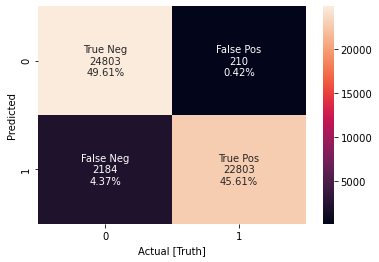

In [96]:
#Confusion Matrix Visualization
cfmatrix1 = confusion_matrix(y1_test, pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix1.flatten()/np.sum(cfmatrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
cf2 = sns.heatmap(cfmatrix1, annot=labels, fmt='') 
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
print(cf2)

## CLASSIFIER 3: DECISION TREE

In [76]:
# for decision tree object
from sklearn.tree import DecisionTreeClassifier
# for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
# for visualizing
from sklearn.tree import plot_tree

In [77]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()

In [80]:
# fit the training data
dtree.fit(X1_train,y1_train)
print('Decision Tree Classifier is created')

Decision Tree Classifier is created


In [81]:
# Testing
pred1 = dtree.predict(X1_test)

In [82]:
pred1

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [83]:
y1_test

3582     0
60498    1
53227    1
21333    1
3885     0
        ..
60717    1
87123    0
5119     0
3023     0
96039    0
Name: classification, Length: 50000, dtype: int64

In [85]:
print(confusion_matrix(y1_test,pred1))  

[[25013     0]
 [    0 24987]]


In [89]:
 target_names=['1','0']
print('Classification report: \n', classification_report(y1_test, pred1,target_names=target_names))

Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     25013
           0       1.00      1.00      1.00     24987

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



AxesSubplot(0.125,0.125;0.62x0.755)


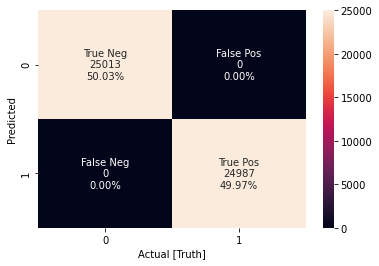

In [97]:
#Confusion Matrix Visualization
cfmatrix = confusion_matrix(y1_test, pred1)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cfmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfmatrix.flatten()/np.sum(cfmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
cf2 = sns.heatmap(cfmatrix, annot=labels, fmt='') 
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
print(cf2)

In [98]:
from sklearn.model_selection import cross_val_score

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('DT', DecisionTreeClassifier(random_state=100)),('Naive Bayes',GaussianNB())]: 
    cv_scores=cross_val_score(method,X,y,cv=5)
    print('\nEstimator: {}'.format(name))
    print(cv_scores)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
  


Estimator: SVM
[0.45   0.55   0.5    0.5766 0.5   ]
Average 5-Fold CV Score: 0.51532

Estimator: DT
[1. 1. 1. 1. 1.]
Average 5-Fold CV Score: 1.0

Estimator: Naive Bayes
[0.87525 0.8325  0.7177  0.82265 0.9293 ]
Average 5-Fold CV Score: 0.8354799999999999
